In [2]:
import os, sys

%matplotlib inline
import IPython.display as ipd

path= '/Users/sbielfel/Nextcloud2/time_resolved/'
sys.path.append(path)
%load_ext autoreload
%autoreload 2


from occupancy import *


In [3]:
blur_by = 2
alpha = 0.3
noise_level = 0
obj1, obj0 =  make_objs(blur_by=blur_by)
f_dark, f_light, delta_fa_abs = make_working_vars(obj1, obj0, alpha, old_version=False)
# make_working_vars(obj1, obj0, alpha, old_version=True) 


In [4]:
np.sum(np.abs(delta_fa_abs)) / np.sum(np.abs(f_dark))

0.04069075015369523

[0.01 0.1  0.15 0.3  0.6  0.9 ]


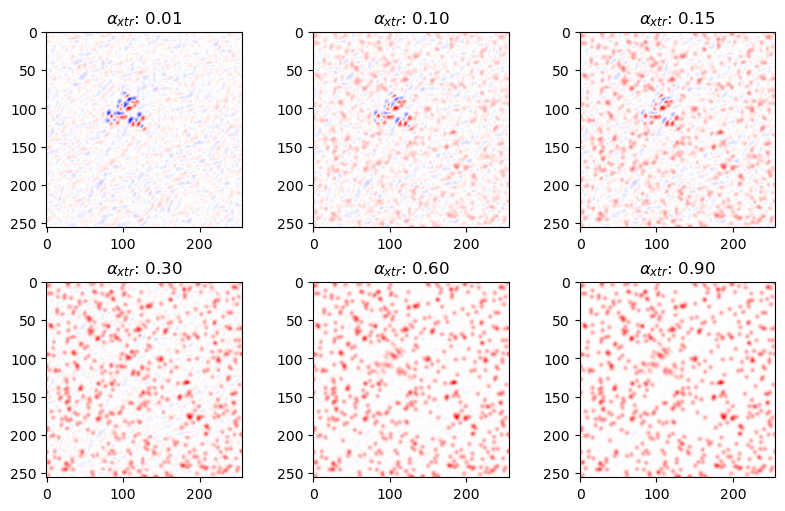

In [8]:
# make_working_vars(obj1, obj0, alpha, old_version=True) 

alpha_xtrs_vis = np.array([0.01, 0.1, alpha/2, alpha, 2*alpha, .9])
f_xtrs_vis = make_f_xtr(alpha_xtrs_vis, f_dark, f_light, np.angle(f_dark),  version=1, noise_level = 0)
dens_xtrs_vis, _ = marius(f_xtrs_vis)
# dens_xtrs_vis = np.fft.fftn(f_xtrs_vis, axes=np.arange(1,f_xtrs_vis.ndim)).real
fig, axs = plt.subplots(2,3, figsize=(8,5),constrained_layout=True)
steps = 1
print(alpha_xtrs_vis)
for ax, alpha_xtr, arr in zip(axs.flat, alpha_xtrs_vis,dens_xtrs_vis):
    raw = [r"$\alpha_{xtr}$",
           r"$\alpha_t$"]
    tit = f"{raw[0]}: {alpha_xtr:.2f}"
    ax.set_title(tit)
    diff = (arr-obj0)
    diff = arr
    vmax = np.max(arr)
    im = ax.imshow(diff, cmap="bwr",vmin=-vmax, vmax=vmax)
    # plt.colorbar(im)
plt.show()    

# new stuff

In [25]:
obj_dd = alpha * (obj1-obj0)
noise  = np.random.normal(size=obj0.shape)*0.01
obj_diff = alpha * (obj1-obj0) + noise

[0.01 0.1  0.15 0.3  0.6  0.9 ]


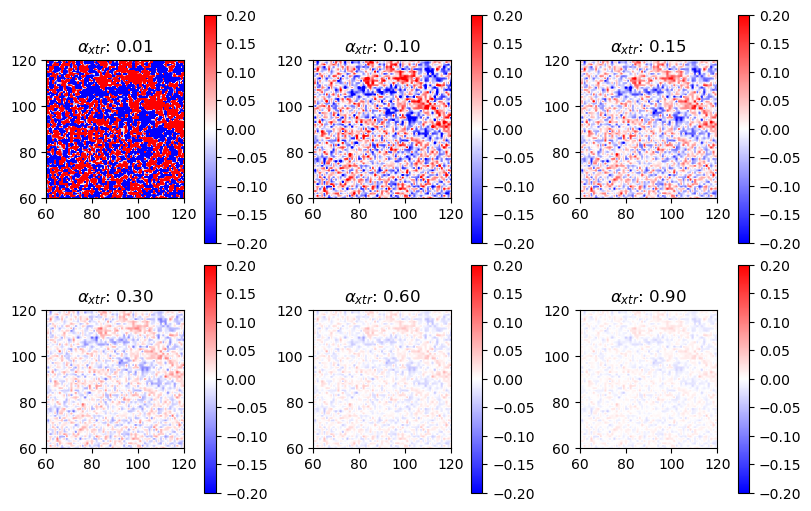

In [26]:
alpha_xtrs_vis = np.array([0.01, 0.1, alpha/2, alpha, 2*alpha, .9])
fig, axs = plt.subplots(2,3, figsize=(8,5),constrained_layout=True)
steps = 1
print(alpha_xtrs_vis)
for ax, alpha_xtr, arr in zip(axs.flat, alpha_xtrs_vis,dens_xtrs_vis):
    raw = [r"$\alpha_{xtr}$",
           r"$\alpha_t$"]
    tit = f"{raw[0]}: {alpha_xtr:.2f}"
    ax.set_title(tit)
    arr = 1/alpha_xtr * obj_diff
    vmax = np.max(0.2)
    im = ax.imshow(arr, cmap="bwr",vmin=-vmax, vmax=vmax)
    ax.set_xlim(60,120)
    ax.set_ylim(60,120)
    plt.colorbar(im)


# old stuff

0.10379099702048852
0.10379099702048852


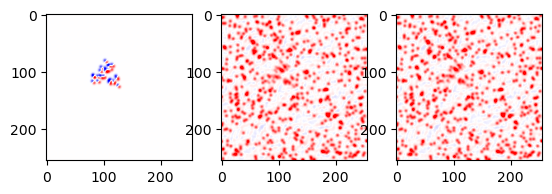

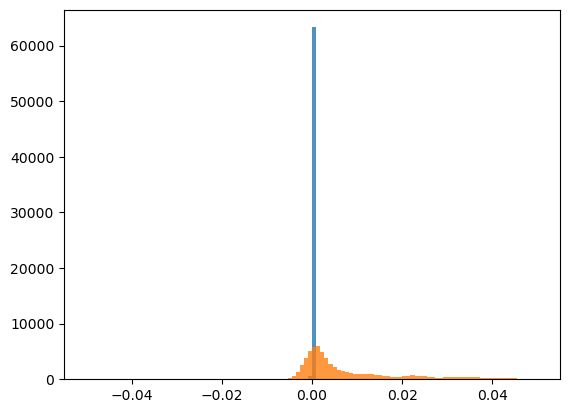

In [ ]:
fig, axs = plt.subplots(1,3)
ax = axs[0]
dobj = obj1-obj0

ax.imshow(dobj, cmap="bwr",vmin=-np.max(.05), vmax=.05)
ax = axs[1]
ax.imshow(dens_xtrs[4],cmap="bwr",vmin=-np.max(.05), vmax=.05)
ax = axs[2]
ax.imshow(dens_xtrs[4]-alpha*(dobj), cmap="bwr",vmin=-np.max(.05), vmax=.05)
# ax.imshow(dens_xtrs[4]+obj0-obj1, cmap="bwr",vmin=-np.max(.05), vmax=.05)
print(np.max(obj0))
print(np.max(obj0))
bins = np.linspace(-0.05,0.05,111)
plt.figure()
plt.hist(2*alpha*dobj.flatten(), alpha=.8,bins=bins)
_ = plt.hist(dens_xtrs[4].flatten(), alpha=.8,bins=bins)
# plt.ylim(0,700)

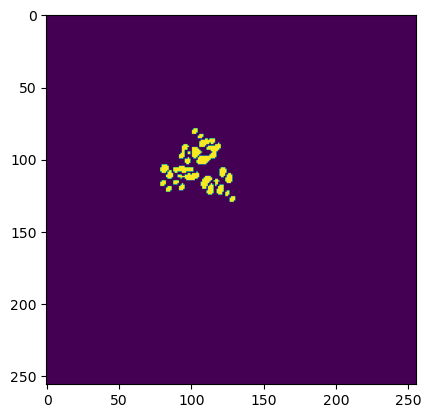

In [343]:
delta_obj = alpha*(obj1-obj0)
mask_pks = np.abs(delta_obj)>0.005
fig, axs = plt.subplots(1,1)
# ax = axs[0]
axs.imshow(mask_pks)
# ax = axs[1]
# ax.imshow(mask_pks)

In [379]:
from occupancy import x8_density_map7
from occupancy import x8_density_map

vvv=1
delta_obj = alpha*obj1-alpha*obj0
delta_obj = obj1a-obj0
mask_pks = np.abs(delta_obj)>0.01
f_mix = np.fft.fft2(delta_obj)
true_phase = np.angle(f_mix)
rand_phase = np.random.uniform(size=true_phase.shape)*2*np.pi

alpha_xtrs = np.linspace(5e-2,1,150 )

f_xtrs = make_f_xtr(alpha_xtrs, f_dark, f_light, np.angle(f_dark),  version=vvv, noise_level=0)
peak_sum, real_CC = x8_density_map(f_xtrs, mask_pks, obj0, delta_obj)
peak_sum4, real_CC4, real_CC2 = x8_density_map7(f_xtrs, mask_pks, obj0, delta_obj)

# f_xtrs_opt = make_f_xtr(alpha_xtrs, f_dark, f_light, true_phase,  version=vvv, noise_level=noise_level)
# peak_sum_opt, real_CC_opt = x8_density_map(f_xtrs_opt, mask_pks, delta_obj)

# f_xtrs_rand = make_f_xtr(alpha_xtrs, f_dark, f_light, np.angle(f_light),  version=vvv, noise_level=noise_level)
# peak_sum_rand, real_CC_rand = x8_density_map(f_xtrs_rand, mask_pks,delta_obj)

plt.figure()
ax = plt.gca()
ax.axvline(alpha,c="k", linestyle="-.", label="alpha_true")
ax.axvline(alpha*2,c="k", linestyle="--", label="2*alpha_true")
# ax.axvline(alpha/2,c="k", linestyle="-.", label="True alpha/2")
ax.plot(alpha_xtrs,peak_sum, label=r"$\phi_{dark}$",color="g")

ax.plot(alpha_xtrs,peak_sum_opt, label=r"$\phi_{opt}$",color="blue")
ax.plot(alpha_xtrs,peak_sum_rand, label=r"$\phi_{light}$",color="red")
print(alpha_xtrs[np.argmin(peak_sum)])
print(alpha_xtrs[np.argmin(peak_sum_opt)])
ax.set_ylabel("Ratio prominent over all peaks")
ax.set_xlabel("Alphas")
ax.legend(loc="lower right")
ax.set_title("Difference Map Method")
plt.close()

0.3050335570469798
0.05


Text(0.5, 0, 'occupancy')

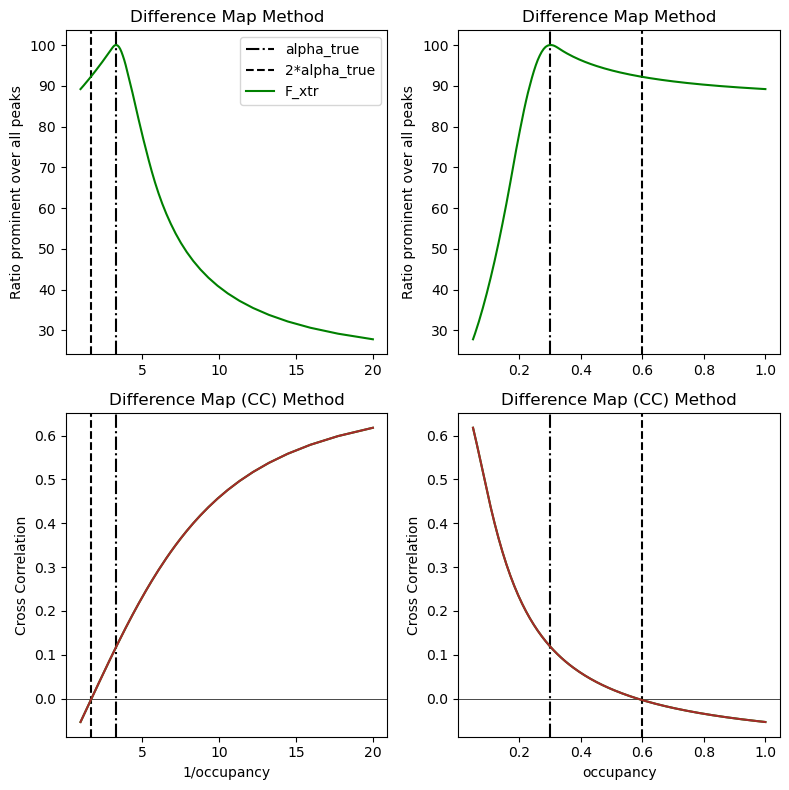

In [380]:
fig, axs = plt.subplots(2,2, figsize=(8,8),tight_layout=True)
for ax in axs[0] :
    ax.set_ylabel("Ratio prominent over all peaks")
    ax.set_title("Difference Map Method")
    
for ax in axs[:,0] :
    ax.axvline(1/alpha,c="k", linestyle="-.", label="alpha_true")
    ax.axvline(1/(alpha*2),c="k", linestyle="--", label="2*alpha_true")
    
for ax in axs[:,1] :
    ax.axvline(alpha,c="k", linestyle="-.", label="alpha_true")
    ax.axvline(alpha*2,c="k", linestyle="--", label="2*alpha_true")
    
for ax in axs[1] :
    ax.axhline(0,c="k", linewidth=.5, )
    ax.set_ylabel("Cross Correlation")
    ax.set_xlabel("Alphas")
    ax.set_title("Difference Map (CC) Method")

ax = axs[0,0]
ax.plot(1/alpha_xtrs,1/peak_sum, label=r"F_xtr",color="g")
# ax.plot(1/alpha_xtrs,1/peak_sum4, label=r"F_xtr-F0",color="brown")
ax.legend()

ax = axs[0,1]
ax.plot(alpha_xtrs,1/peak_sum, label=r"$\phi_{0}$",color="g")
# ax.plot(alpha_xtrs,1/peak_sum4, label=r"$\phi_{0}$",color="brown")

ax = axs[1,0]
ax.plot(1/alpha_xtrs,real_CC, label=r"$\phi_{0}$",color="g")
ax.plot(1/alpha_xtrs,real_CC4, label=r"$\phi_{0}$",color="brown")
# ax.plot(1/alpha_xtrs,real_CC2, label=r"$\phi_{0}$",color="blue")
ax.set_xlabel("1/occupancy")

ax = axs[1,1]
ax.plot(alpha_xtrs,real_CC,  label=r"F_xtr"    ,    color="g")
ax.plot(alpha_xtrs,real_CC4, label=r"F_xtr-F0",color="brown")
# ax.plot(alpha_xtrs,real_CC2, label=r"$\phi_{0}$",color="blue")
ax.set_xlabel("occupancy")


In [381]:
plt.figure()
ax = plt.gca()
ax.axvline(alpha,c="k", linestyle="-.", label="alpha_true")
ax.axvline(alpha*2,c="k", linestyle="--", label="2*alpha_true")
ax.axhline(0,c="k", linewidth=.5, )
ax.plot(alpha_xtrs,real_CC, label=r"$\phi_{0}$",color="g")
ax.plot(alpha_xtrs,real_CC_opt, label=r"$\phi_{opt}$",color="blue")
ax.plot(alpha_xtrs,real_CC_rand, label=r"$\phi_{rand}$",color="grey")
ax.set_ylabel("Cross Correlation")
ax.set_xlabel("Alphas")
ax.legend(loc="lower right")
ax.set_title("Difference Map (CC) Method")
plt.close()


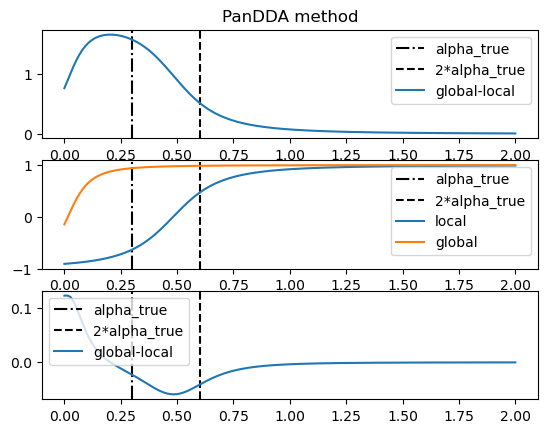

In [346]:
alpha_xtrs = np.linspace(1e-3,2,150 )
f_xtrs = make_f_xtr(alpha_xtrs, f_dark, f_light, np.angle(f_dark),  version=1, noise_level=0)
mean_local, mean_global = pandda(f_dark, f_xtrs, mask_pks)
fig, axs = plt.subplots(3)
ax = axs[0]
ax.axvline(alpha,c="k", linestyle="-.", label="alpha_true")
ax.axvline(alpha*2,c="k", linestyle="--", label="2*alpha_true")
ax.plot(alpha_xtrs,+mean_global-mean_local, label="global-local") 
ax.legend()
ax.set_title("PanDDA method")
ax = axs[1]
ax.axvline(alpha,c="k", linestyle="-.", label="alpha_true")
ax.axvline(alpha*2,c="k", linestyle="--", label="2*alpha_true")
ax.plot(alpha_xtrs,mean_local, label="local") 
ax.plot(alpha_xtrs, mean_global,label="global")
ax.legend()
ax = axs[2]
ax.axvline(alpha,c="k", linestyle="-.", label="alpha_true")
ax.axvline(alpha*2,c="k", linestyle="--", label="2*alpha_true")
ax.plot(alpha_xtrs,+np.gradient(mean_global-mean_local), label="global-local") 
ax.legend()


In [311]:
pearsonr(obj1.flatten(),obj0.flatten())
pearsonr(obj1[~mask_pks].flatten(),obj0[~mask_pks].flatten())

PearsonRResult(statistic=0.9852846078553377, pvalue=0.0)

# Where's my mind?


-0.02117815245642123

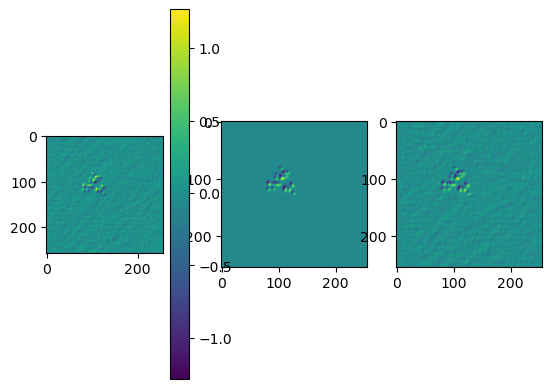

In [197]:
f_dark_abs = np.abs(f_dark)
f_angle = np.angle(f_dark)
f_light_abs = np.abs(f_light)
delta_f = (f_light_abs - f_dark_abs) 
beta = .01
delta_f_with_phase = delta_f * np.exp(1j * f_angle)
f_xtr = 2/beta*delta_f_with_phase+f_dark
dens_xtr = np.fft.ifft2(f_xtr).real
real_CC = pearsonr(dens_xtr.flatten(), delta_obj.flatten())[0]
fig, axs = plt.subplots(1,3)
ax = axs[0]
im =ax.imshow(obj1-dens_xtr)
plt.colorbar(im)
ax = axs[1]
ax.imshow(delta_obj)
ax = axs[2]
ax.imshow(np.fft.ifft2(delta_f_with_phase).real)
alpha2 = 0.3
mixed = (1-alpha2)*obj0+ alpha2*obj1
real_CC = pearsonr(dens_xtr.flatten(), obj0.flatten())[0]
real_CC

## Insight: 

es geht um die Diffmap - da Kontraste stärker

falsche Variante war:
$F_{pert} = (1-\alpha) F_0 + \alpha (F_1 - F_0) = \alpha F_1 + F_0 - 2\alpha$ 

[0.01 0.1  0.15 0.3  0.6  0.9 ]


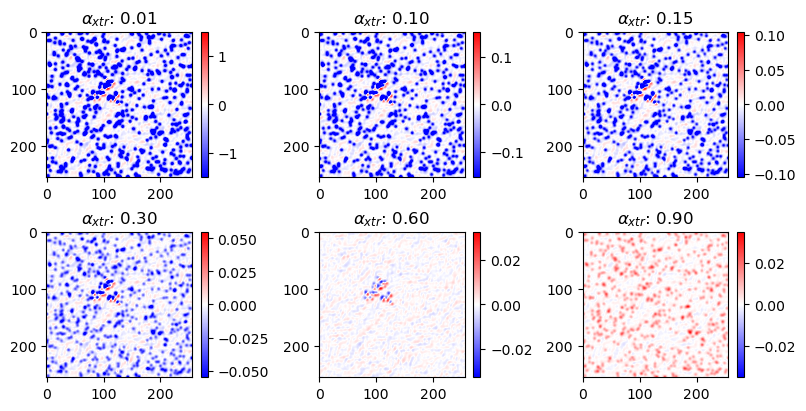

In [246]:
alpha = 0.3
noise_level = 0
obj1, obj0 =  make_objs(blur_by=blur_by)
f_dark, f_light, delta_fa_abs = make_working_vars(obj1, obj0, alpha, old_version=True)
alpha_xtrs_vis = np.array([0.01, 0.1, alpha/2, alpha, 2*alpha, .9])
f_xtrs_vis = make_f_xtr(alpha_xtrs_vis, f_dark, f_light, np.angle(f_dark),  version=1, noise_level = 0)
dens_xtrs_vis, _ = marius(f_xtrs_vis)
# dens_xtrs_vis = np.fft.fftn(f_xtrs_vis, axes=np.arange(1,f_xtrs_vis.ndim)).real
fig, axs = plt.subplots(2,3, figsize=(8,4),constrained_layout=True)
steps = 1
print(alpha_xtrs_vis)
for ax, alpha_xtr, arr in zip(axs.flat, alpha_xtrs_vis,dens_xtrs_vis):
    raw = [r"$\alpha_{xtr}$",
           r"$\alpha_t$"]
    tit = f"{raw[0]}: {alpha_xtr:.2f}"
    ax.set_title(tit)
    # diff = (arr-obj0)
    vmax = np.max(arr)
    im = ax.imshow(arr, cmap="bwr",vmin=-vmax, vmax=vmax)
    plt.colorbar(im)
plt.show()    


0.01 PearsonRResult(statistic=0.1155340232242334, pvalue=1.5875195110420903e-193)
0.1 PearsonRResult(statistic=0.7411763418007452, pvalue=0.0)
0.15 PearsonRResult(statistic=0.8700300575902657, pvalue=0.0)
0.3 PearsonRResult(statistic=0.9687208171317745, pvalue=0.0)
0.6 PearsonRResult(statistic=0.9838220033605418, pvalue=0.0)
0.9 PearsonRResult(statistic=0.982071868278593, pvalue=0.0)


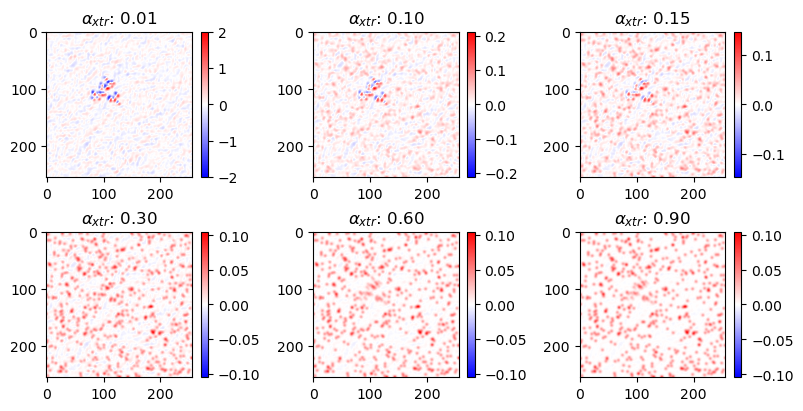

In [411]:
f_dark, f_light, delta_fa_abs = make_working_vars(obj1, obj0, alpha, old_version=False)
alpha_xtrs_vis = np.array([0.01, 0.1, alpha/2, alpha, 2*alpha, .9])
f_xtrs_vis = make_f_xtr(alpha_xtrs_vis, f_dark, f_light, np.angle(f_dark),  version=1, noise_level = 0)
dens_xtrs_vis, _ = marius(f_xtrs_vis)
# dens_xtrs_vis = np.fft.fftn(f_xtrs_vis, axes=np.arange(1,f_xtrs_vis.ndim)).real
fig, axs = plt.subplots(2,3, figsize=(8,4),constrained_layout=True)
steps = 1
for ax, alpha_xtr, arr in zip(axs.flat, alpha_xtrs_vis,dens_xtrs_vis):
    raw = [r"$\alpha_{xtr}$",
           r"$\alpha_t$"]
    tit = f"{raw[0]}: {alpha_xtr:.2f}"
    ax.set_title(tit)
    diff = (arr-alpha_xtr*obj0)
    diff = arr
    print(alpha_xtr,pearsonr(arr.flatten(),obj1.flatten()))
    vmax = np.max(diff)
    im = ax.imshow(diff, cmap="bwr",vmin=-vmax, vmax=vmax)
    plt.colorbar(im)
plt.show()    

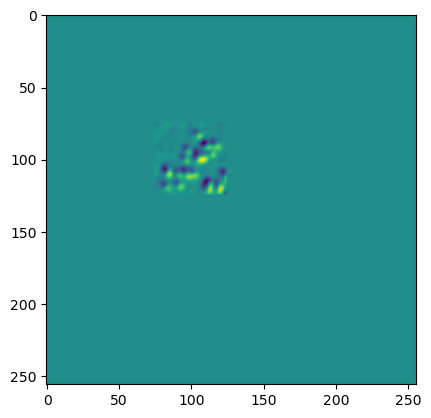

In [444]:
mask_pks2 =  np.zeros_like(mask_pks)
mask_pks2[75:125,75:125] = True
plt.imshow((dens-obj0)*mask_pks2)

Text(0.5, 0, 'occupancy')

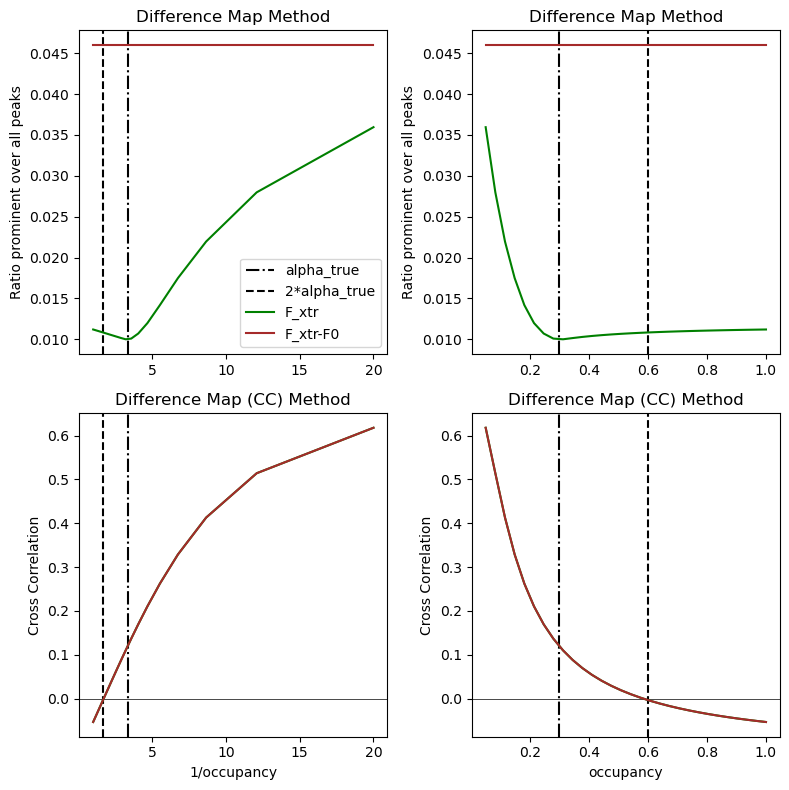

In [454]:
alpha_xtrs = np.linspace(5e-2,1,30 )
f_xtrs = make_f_xtr(alpha_xtrs, f_dark, f_light, np.angle(f_dark),  version=vvv, noise_level=0)
peak_sum, real_CC = x8_density_map(f_xtrs, mask_pks, obj0, delta_obj)
peak_sum4, real_CC4, real_CC2 = x8_density_map7(f_xtrs, mask_pks, obj0, delta_obj)
fig, axs = plt.subplots(2,2, figsize=(8,8),tight_layout=True)
for ax in axs[0] :
    ax.set_ylabel("Ratio prominent over all peaks")
    ax.set_title("Difference Map Method")
    
for ax in axs[:,0] :
    ax.axvline(1/alpha,c="k", linestyle="-.", label="alpha_true")
    ax.axvline(1/(alpha*2),c="k", linestyle="--", label="2*alpha_true")
    
for ax in axs[:,1] :
    ax.axvline(alpha,c="k", linestyle="-.", label="alpha_true")
    ax.axvline(alpha*2,c="k", linestyle="--", label="2*alpha_true")
    
for ax in axs[1] :
    ax.axhline(0,c="k", linewidth=.5, )
    ax.set_ylabel("Cross Correlation")
    ax.set_xlabel("Alphas")
    ax.set_title("Difference Map (CC) Method")

ax = axs[0,0]
ax.plot(1/alpha_xtrs,peak_sum, label=r"F_xtr",color="g")
ax.plot(1/alpha_xtrs,peak_sum4, label=r"F_xtr-F0",color="brown")
ax.legend()

ax = axs[0,1]
ax.plot(alpha_xtrs,peak_sum, label=r"$\phi_{0}$",color="g")
ax.plot(alpha_xtrs,peak_sum4, label=r"$\phi_{0}$",color="brown")

ax = axs[1,0]
ax.plot(1/alpha_xtrs,real_CC, label=r"$\phi_{0}$",color="g")
ax.plot(1/alpha_xtrs,real_CC4, label=r"$\phi_{0}$",color="brown")
# ax.plot(1/alpha_xtrs,real_CC2, label=r"$\phi_{0}$",color="blue")
ax.set_xlabel("1/occupancy")

ax = axs[1,1]
ax.plot(alpha_xtrs,real_CC,  label=r"F_xtr"    ,    color="g")
ax.plot(alpha_xtrs,real_CC4, label=r"F_xtr-F0",color="brown")
# ax.plot(alpha_xtrs,real_CC2, label=r"$\phi_{0}$",color="blue")
ax.set_xlabel("occupancy")



Text(0.5, 0, 'Occupancy')

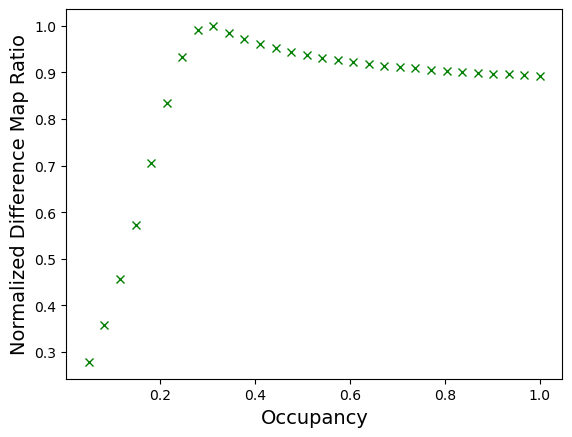

In [455]:
peak_sum, real_CC = x8_density_map(f_xtrs, mask_pks, obj0, delta_obj)
ps = 1/peak_sum/np.max(1/peak_sum)
plt.figure()
ax = plt.gca()
ax.plot(alpha_xtrs,ps, label=r"F_xtr",linestyle="", marker="x",color="g")
ax.set_ylabel("Normalized Difference Map Ratio", fontsize=fs)
ax.set_xlabel("Occupancy", fontsize=fs)
# ax.set_title("Difference Map Method")
# ax.axvline(1/alpha,c="k", linestyle="-.", label="alpha_true")
# ax.axvline(1/(alpha*2),c="k", linestyle="--", label="2*alpha_true")


In [448]:
obj1a = (1-alpha) * obj0 + alpha * obj1
delta_obj = obj1a-obj0
alpha_xtrs = np.linspace(0,1,140)+1e-10
f_xtrs = make_f_xtr(alpha_xtrs, f_dark, f_light, np.angle(f_dark),  version=1, noise_level = 2)
p1, p2, p_sum1, p_sum2 = x8_density_map_inspect(f_xtrs, mask_pks2, obj0, delta_obj)

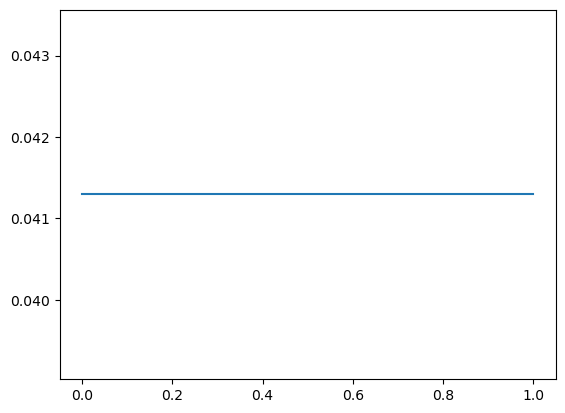

(0.0, 10.0)

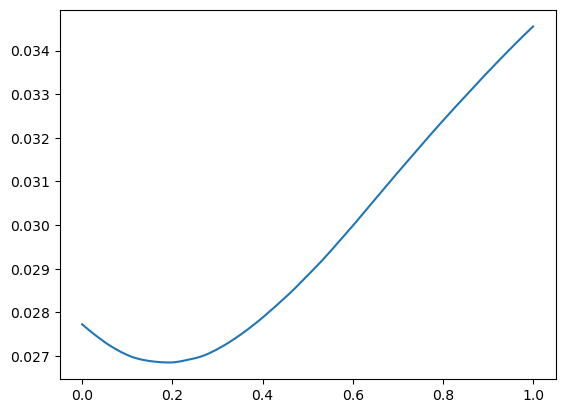

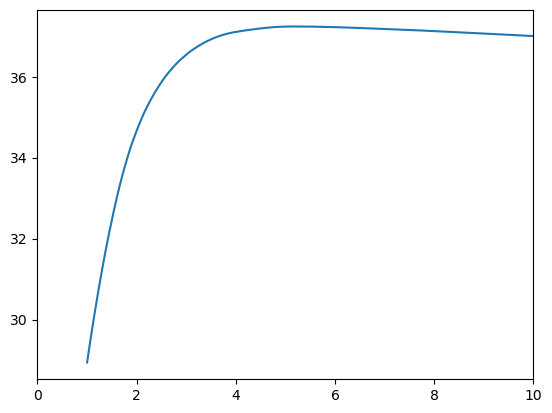

In [449]:
plt.figure()
plt.plot(alpha_xtrs,(p1/p_sum1))
# plt.plot(alpha_xtrs,(p_sum1))
# plt.plot(alpha_xtrs,(p_sum2))
plt.show()
plt.figure()
# plt.plot(alpha_xtrs,p2/p_sum)
# plt.figure()
plt.plot(alpha_xtrs,(p2/p_sum))
# plt.xlim(0,20)
# plt.figure()
# plt.plot(alpha_xtrs,p_sum/p1)
# plt.plot(alpha_xtrs,p_sum/p2)
plt.figure()
plt.plot(1/alpha_xtrs,p_sum/p2)
plt.xlim(0,10)
# plt.plot(alpha_xtrs,p_sum)

# Adding Noise

In [22]:
blur_by = 2
alpha = 0.3
noise_level_one = 3
obj1, obj0 =  make_objs(blur_by=blur_by)
f_dark, f_light, delta_fa_abs = make_working_vars(obj1, obj0, alpha, old_version=False)


In [23]:
alpha_xtrs = np.linspace(0,1,340)+1e-10
f_xtrs = make_f_xtr(alpha_xtrs, f_dark, f_light, np.angle(f_dark),  version=1, noise_level = noise_level_one)
corr_x8 = x8_inspired(np.abs(f_dark),np.abs(f_light), np.abs(f_xtrs))

Text(0, 0.5, 'Gradient of CC')

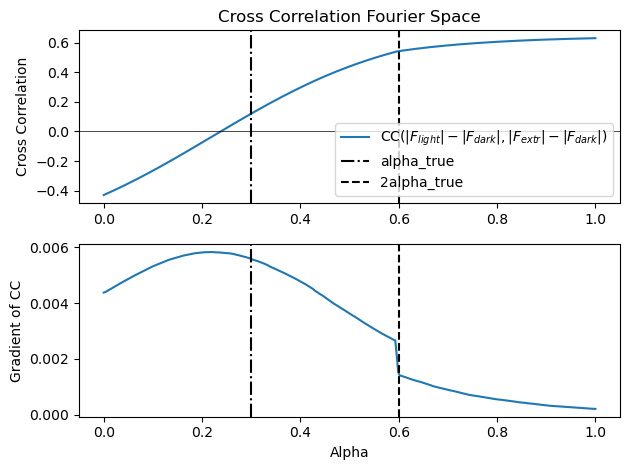

In [22]:
fig, axs = plt.subplots(2, tight_layout=True)
ax = axs[0]
ax.plot(alpha_xtrs,corr_x8, label="CC($|F_{light}|-|F_{dark}|, |F_{extr}| - |F_{dark}|$)")
ax.axhline(0,c="k", linewidth=.5, )
ax.axvline(alpha,c="k", linestyle="-.", label="alpha_true")
ax.axvline(2*alpha,c="k", linestyle="--", label="2alpha_true")
ax.legend()
ax.set_ylabel("Cross Correlation")
ax.set_title("Cross Correlation Fourier Space")
ax = axs[1]

ax.plot(alpha_xtrs,np.gradient(corr_x8), label="CC($|F_{light}|-|F_{dark}|, |F_{extr}| - |F_{dark}|$)")
ax.axvline(alpha,c="k", linestyle="-.", label="alpha_true")
ax.axvline(2*alpha,c="k", linestyle="--", label="2alpha_true")
# ax.axvline(alpha/2,c="k", linestyle="-.", label="True alpha/2")
# ax.legend()
ax.set_xlabel("Alpha")
ax.set_ylabel("Gradient of CC")

Text(0.5, 0, 'Noise Level (relative to mean intensity)')

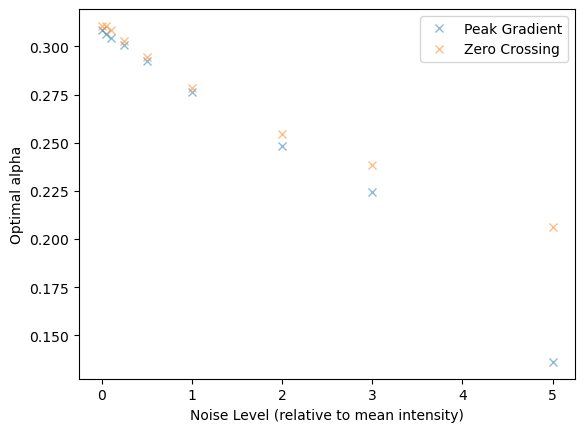

In [23]:
levels = [0,0.05,0.1, 0.25, 0.5, 1, 2, 3, 5]
alpha_xtrs = np.linspace(0,1,500)+1e-10
alpha_max = np.empty(len(levels))
alpha_closest = np.empty(len(levels))
for ii, noise_level in enumerate(levels):
    f_xtrs = make_f_xtr(alpha_xtrs, f_dark, f_light, np.angle(f_dark),  version=1, noise_level = noise_level)
    corr_x8 = x8_inspired(np.abs(f_dark),np.abs(f_light), np.abs(f_xtrs))
    max_idx = np.argmax(np.gradient(corr_x8))
    closest_index = min(range(len(corr_x8)), key=lambda i: abs(corr_x8[i]))
    alpha_max[ii] = alpha_xtrs[max_idx]
    alpha_closest[ii] = alpha_xtrs[closest_index]

plt.figure()
ax =plt.gca()
ax.plot(levels, alpha_max, "x", alpha=0.5, label="Peak Gradient")
ax.plot(levels, alpha_closest, "x", alpha=0.5, label = "Zero Crossing")
ax.legend()
ax.set_ylabel("Optimal alpha")
ax.set_xlabel("Noise Level (relative to mean intensity)")



In [42]:
alpha_invs = (np.arange(0,20)+1e-10)
alpha_xtrs = 2/alpha_invs
alpha_xtrs = np.array([0.01, 0.1, alpha/2, alpha, 2*alpha, 1])
from occupancy import marius
f_xtrs = make_f_xtr(alpha_xtrs, f_dark, f_light, np.angle(f_light),  version=1, noise_level = 3)
dens_xtrs, neg_sum = marius(f_xtrs)

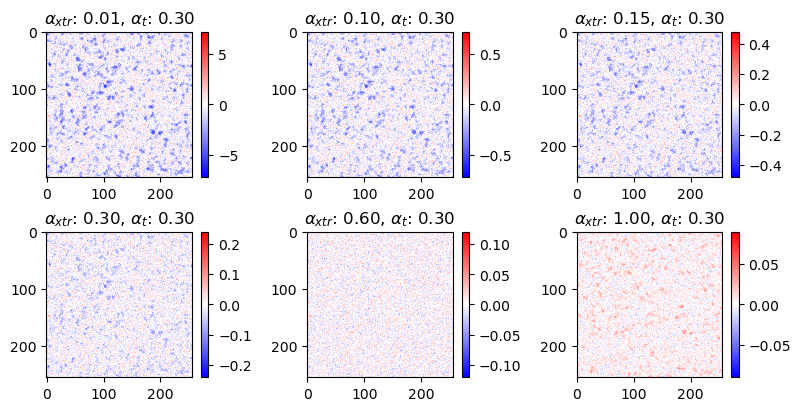

In [43]:
fig, axs = plt.subplots(2,3, figsize=(8,4),constrained_layout=True)
steps = len(alpha_xtrs)//6
for ax, alpha_xtr, arr in zip(axs.flat, alpha_xtrs[::steps],dens_xtrs[::steps]):
    raw = [r"$\alpha_{xtr}$",
           r"$\alpha_t$"]
    tit = f"{raw[0]}: {alpha_xtr:.2f}, {raw[1]}: {alpha:.2f}"
    ax.set_title(tit)
    
    im = ax.imshow((arr), cmap="bwr",vmin=-np.max(arr))
    plt.colorbar(im)
plt.show()    


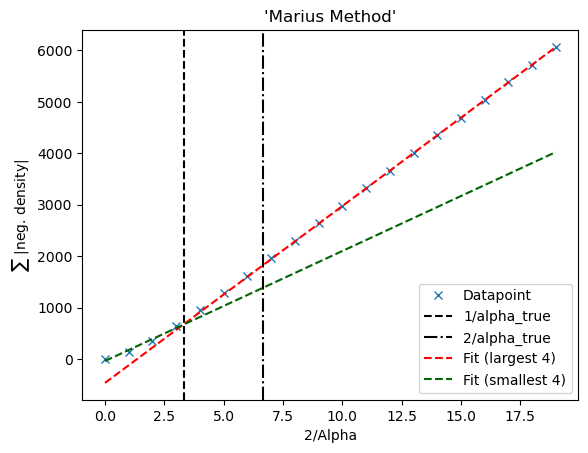

In [26]:
from scipy import stats
n_largest = 4
m1 = alpha_invs>alpha_invs[-n_largest]
m2 = alpha_invs<alpha_invs[n_largest]
res_1 = stats.linregress(alpha_invs[m1], -neg_sum[m1])
res_2 = stats.linregress(alpha_invs[m2], -neg_sum[m2])
# res_11 = stats.linregress(alpha_invs[m11], -neg_sum[m11])
# res_22 = stats.linregress(alpha_invs[m22], -neg_sum[m22])

alpha_line = np.linspace(np.min(alpha_invs), np.max(alpha_invs),5,)

plt.plot(alpha_invs,neg_sum*-1, "x",  label="Datapoint")
plt.axvline(1/alpha,c="k",linestyle="--", label="1/alpha_true")
plt.axvline(2/alpha,c="k",linestyle="-.", label="2/alpha_true")


plt.plot(alpha_line, res_1.intercept+res_1.slope*alpha_line,c="red",linestyle="--", label=f"Fit (largest {n_largest})")
plt.plot(alpha_line, res_2.intercept+res_2.slope*alpha_line, c="darkgreen",linestyle="--",label=f"Fit (smallest {n_largest})")
# plt.plot(alpha_line, res_11.intercept+res_11.slope*alpha_line,c="purple",linestyle="--", label="Fit (all larger )")
plt.legend()
# plt.plot(alpha_line, res_22.intercept+res_22.slope*alpha_line, c="purple",linestyle="--")
plt.xlabel("2/Alpha")
plt.ylabel(r"$\sum$ |neg. density|")
plt.title("'Marius Method'")
plt.savefig("mariusmethod.png")

In [27]:
def get_intersect_and_angle(alpha_invs, neg_sum):
    n_largest = 4
    m1 = alpha_invs>alpha_invs[-n_largest]
    m2 = alpha_invs<alpha_invs[n_largest]
    res_1 = stats.linregress(alpha_invs[m1], -neg_sum[m1])
    res_2 = stats.linregress(alpha_invs[m2], -neg_sum[m2])
    print(res_1.slope,  res_2.slope)
    intersection = (res_2.intercept-res_1.intercept) / (res_1.slope-res_2.slope)
    
    angle_raw = (res_1.slope-res_2.slope) / (1 + res_1.slope*res_2.slope)
    angle = np.degrees(np.arctan(np.abs(angle_raw)))
    return intersection, angle


angles = np.empty(len(levels))
intersections = np.empty(len(levels))
alpha_invs = (np.arange(0,20)+1e-10)
alpha_xtrs = 2/alpha_invs
for ii, noise_level in enumerate(levels):
    f_xtrs = make_f_xtr(alpha_xtrs, f_dark, f_light, np.angle(f_light),  version=1, noise_level = noise_level)
    dens_xtrs, neg_sum = marius(f_xtrs)
    intersections[ii],angles[ii] = get_intersect_and_angle(alpha_invs, neg_sum)
   

187.82305269147446 13.421623320756158
187.99124718207463 13.72505163769134
188.69680202890368 14.660961112061994
191.9993005074657 19.91348888297507
200.6564058952465 33.447296821978796
224.4012961423507 66.70204529163826
279.46163859559283 137.83014908085735
340.1399532652158 210.32841038914972
471.8917124402141 355.6529609598102


In [28]:
np.degrees(np.arctan(np.abs((+18-1.3)/ (1 -18*1.3))))

36.70584432319078

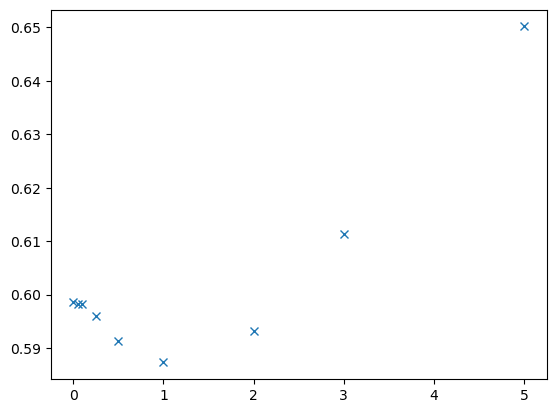

Text(0, 0.5, 'Slope Angle (Deg)')

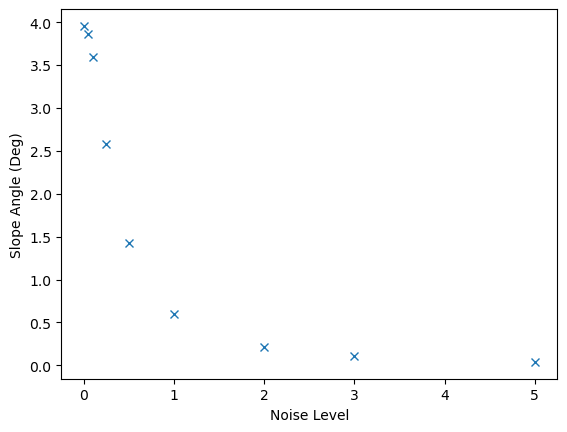

In [29]:
 
plt.plot(levels, 2/intersections, "x")
plt.show()
plt.plot(levels, angles, "x")
plt.xlabel("Noise Level")
plt.ylabel("Slope Angle (Deg)")

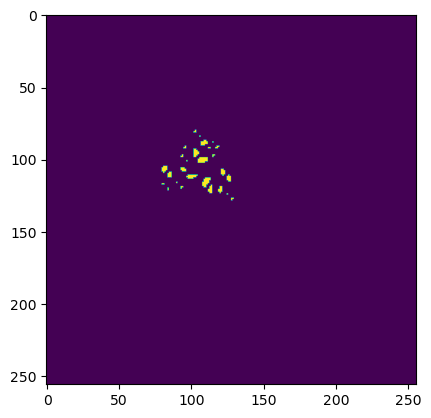

In [30]:
plt.imshow(mask_pks)                            

In [40]:
from occupancy import x8_density_map
noise_level = 1
delta_obj = alpha*(obj1-obj0)
mask_pks = np.abs(delta_obj)>0.01
f_mix = np.fft.fft2(delta_obj)
true_phase = np.angle(f_mix)
rand_phase = np.random.uniform(size=true_phase.shape)*2*np.pi

alpha_xtrs = np.linspace(1e-3,2,150 )
f_xtrs = make_f_xtr(alpha_xtrs, f_dark, f_light, np.angle(f_dark),  version=1, noise_level=noise_level)
f_xtrs_opt = make_f_xtr(alpha_xtrs, f_dark, f_light, true_phase,  version=1, noise_level=noise_level)
f_xtrs_rand = make_f_xtr(alpha_xtrs, f_dark, f_light, rand_phase,  version=1, noise_level=noise_level)
peak_sum, real_CC = x8_density_map(f_xtrs, mask_pks, obj0)
peak_sum_opt, real_CC_opt = x8_density_map(f_xtrs_opt, mask_pks, obj0)
peak_sum_rand, real_CC_rand = x8_density_map(f_xtrs_rand, mask_pks, obj0)

1
0.873046979865772
2.0


Text(0.5, 1.0, 'Difference Map Method')

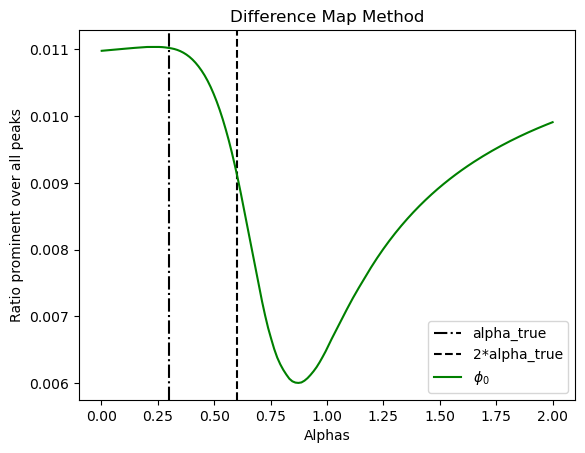

In [41]:
print(noise_level)
plt.figure()
ax = plt.gca()
ax.axvline(alpha,c="k", linestyle="-.", label="alpha_true")
ax.axvline(alpha*2,c="k", linestyle="--", label="2*alpha_true")
# ax.axvline(alpha/2,c="k", linestyle="-.", label="True alpha/2")
ax.plot(alpha_xtrs,peak_sum, label=r"$\phi_{0}$",color="g")

# ax.plot(alpha_xtrs,peak_sum_opt, label=r"$\phi_{opt}$",color="blue")
# ax.plot(alpha_xtrs,peak_sum_rand, label=r"$\phi_{rand}$",color="grey")
print(alpha_xtrs[np.argmin(peak_sum)])
print(alpha_xtrs[np.argmin(peak_sum_opt)])
ax.set_ylabel("Ratio prominent over all peaks")
ax.set_xlabel("Alphas")
ax.legend(loc="lower right")
ax.set_title("Difference Map Method")

Text(0.5, 1.0, 'Difference Map (CC) Method')

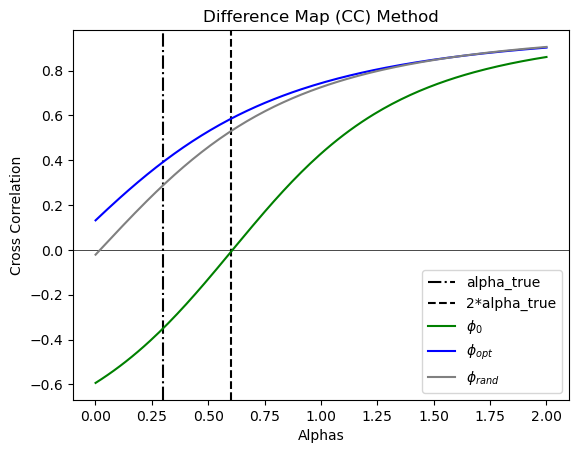

In [215]:
plt.figure()
ax = plt.gca()
ax.axvline(alpha,c="k", linestyle="-.", label="alpha_true")
ax.axvline(alpha*2,c="k", linestyle="--", label="2*alpha_true")
ax.axhline(0,c="k", linewidth=.5, )
ax.plot(alpha_xtrs,real_CC, label=r"$\phi_{0}$",color="g")
ax.plot(alpha_xtrs,real_CC_opt, label=r"$\phi_{opt}$",color="blue")
ax.plot(alpha_xtrs,real_CC_rand, label=r"$\phi_{rand}$",color="grey")
ax.set_ylabel("Cross Correlation")
ax.set_xlabel("Alphas")
ax.legend(loc="lower right")
ax.set_title("Difference Map (CC) Method")


Text(0.5, 1.0, 'Difference Map (CC) Method')

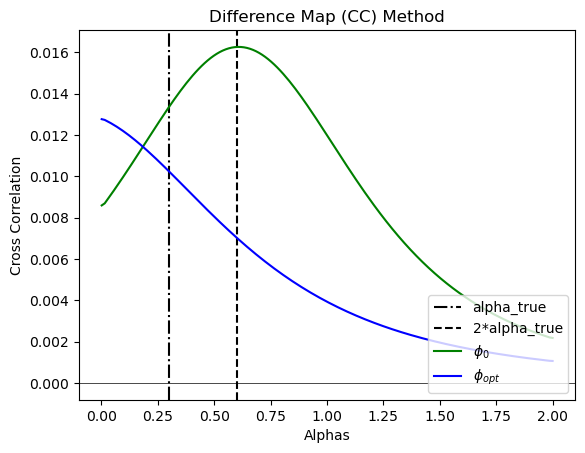

In [216]:
plt.figure()
ax = plt.gca()
ax.axvline(alpha,c="k", linestyle="-.", label="alpha_true")
ax.axvline(alpha*2,c="k", linestyle="--", label="2*alpha_true")
ax.axhline(0,c="k", linewidth=.5, )
ax.plot(alpha_xtrs,np.gradient(real_CC), label=r"$\phi_{0}$",color="g")
ax.plot(alpha_xtrs,np.gradient(real_CC_opt), label=r"$\phi_{opt}$",color="blue")
ax.set_ylabel("Cross Correlation")
ax.set_xlabel("Alphas")
ax.legend(loc="lower right")
ax.set_title("Difference Map (CC) Method")


Text(0.5, 0, 'Noise Level (relative to mean intensity)')

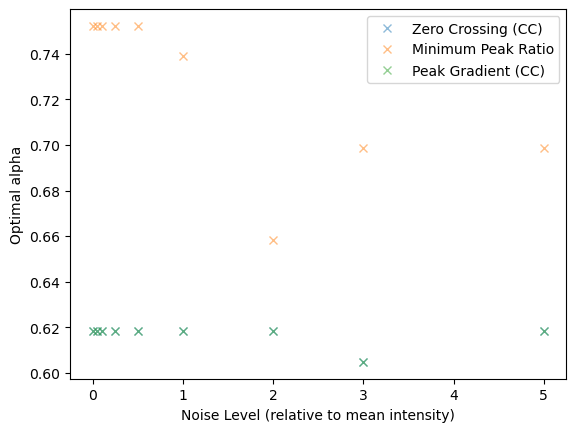

In [217]:

alpha_peak = np.empty(len(levels))
alpha_CC = np.empty(len(levels))
alpha_grad = np.empty(len(levels))
alpha_invs = (np.arange(0,20)+1e-10)
alpha_xtrs = 2/alpha_invs
for ii, noise_level in enumerate(levels):
   
    alpha_xtrs = np.linspace(1e-3,2,150 )
    f_xtrs = make_f_xtr(alpha_xtrs, f_dark, f_light, np.angle(f_light),  version=1, noise_level=noise_level)
    peak_sum, real_CC = x8_density_map(f_xtrs, mask_pks, obj0)
    peak_min = np.argmin(peak_sum)
    grad_min = min(range(len(real_CC)), key=lambda i: abs(real_CC[i]))
    CC_min = np.argmax(np.gradient(real_CC))
    alpha_peak[ii]= alpha_xtrs[peak_min]
    alpha_CC[ii]= alpha_xtrs[CC_min]
    alpha_grad[ii]= alpha_xtrs[grad_min]
    
plt.figure()
ax =plt.gca()
ax.plot(levels, alpha_CC, "x", alpha=0.5, label="Zero Crossing (CC)")
ax.plot(levels, alpha_peak, "x", alpha=0.5, label = "Minimum Peak Ratio")
ax.plot(levels, alpha_grad, "x", alpha=0.5, label = "Peak Gradient (CC)")
ax.legend()
ax.set_ylabel("Optimal alpha")
ax.set_xlabel("Noise Level (relative to mean intensity)")



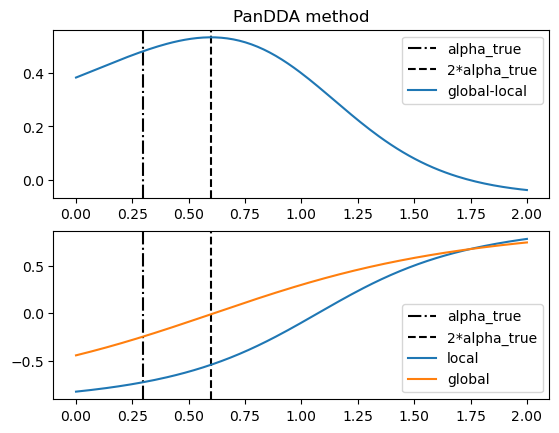

In [218]:
alpha_xtrs = np.linspace(1e-3,2,150 )
noise_level=3
f_xtrs = make_f_xtr(alpha_xtrs, f_dark, f_light, np.angle(f_dark),  version=1, noise_level=noise_level)
mean_local, mean_global = pandda(f_dark, f_xtrs, mask_pks)
fig, axs = plt.subplots(2)
ax = axs[0]
ax.axvline(alpha,c="k", linestyle="-.", label="alpha_true")
ax.axvline(alpha*2,c="k", linestyle="--", label="2*alpha_true")
ax.plot(alpha_xtrs,+mean_global-mean_local, label="global-local") 
ax.legend()
ax.set_title("PanDDA method")
ax = axs[1]
ax.axvline(alpha,c="k", linestyle="-.", label="alpha_true")
ax.axvline(alpha*2,c="k", linestyle="--", label="2*alpha_true")
ax.plot(alpha_xtrs,mean_local, label="local") 
ax.plot(alpha_xtrs, mean_global,label="global")
ax.legend()
# ax = axs[2]
# ax.axvline(alpha,c="k", linestyle="-.", label="alpha_true")
# ax.axvline(alpha*2,c="k", linestyle="--", label="2*alpha_true")
# ax.plot(alpha_xtrs,+np.gradient(mean_global-mean_local), label="global-local") 
# ax.legend()
# print(alpha_xtrs[np.argmax(mean_global-mean_local)])

In [219]:
alpha_pandda = np.empty(len(levels))

alpha_xtrs = np.linspace(1e-3,2,150 )
for ii, noise_level in enumerate(levels):
   
    f_xtrs = make_f_xtr(alpha_xtrs, f_dark, f_light, np.angle(f_light),  version=1, noise_level=noise_level)
    mean_local, mean_global = pandda(f_dark, f_xtrs, mask_pks)
    mean_diff = np.gradient(mean_global-mean_local)
    closest_index = min(range(len(mean_diff)), key=lambda i: abs(mean_diff[i]))
    idx_pandda = np.argmax(mean_global-mean_local)
    alpha_pandda[ii]= alpha_xtrs[idx_pandda]
   

Text(0.5, 0, 'Noise Level (relative to mean intensity)')

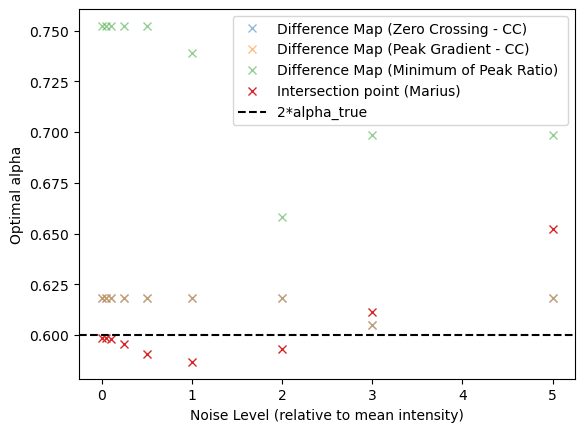

In [220]:
 
plt.figure()
ax =plt.gca()
# ax.plot(levels, alpha_pandda, "x", alpha=0.5, label="Pandda (Max value)")
ax.plot(levels, alpha_CC, "x", alpha=0.5, label="Difference Map (Zero Crossing - CC)")
ax.plot(levels, alpha_grad, "x", alpha=0.5, label = "Difference Map (Peak Gradient - CC)")
ax.plot(levels, alpha_peak, "x", alpha=0.5, label = "Difference Map (Minimum of Peak Ratio) ")
ax.plot(levels, 2/intersections, "x", label="Intersection point (Marius)")
ax.axhline(2*alpha, linestyle="--", color='k',label="2*alpha_true")

ax.legend()
ax.set_ylabel("Optimal alpha")
ax.set_xlabel("Noise Level (relative to mean intensity)")